<a href="https://colab.research.google.com/github/HoanChan/TableVision/blob/main/border_table_detection.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

In [1]:
#@title Cài đặt kiểm tra môi trường và tải mã nguồn để lấy dữ liệu
# Kiểm tra hiện tại có phải đang ở trong colaboratory hay không
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !git clone https://github.com/HoanChan/TableVision.git TableVision
    %cd TableVision
else:
    print("Running on Local")
prePath = "/content/TableVision/" if IN_COLAB else ""

Running on Local


In [2]:
from utils.ocr import *

detector = init_VietOCR()

Đã cài đặt thư viện nhận diện văn bản


/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


<Figure size 1000x2000 with 0 Axes>

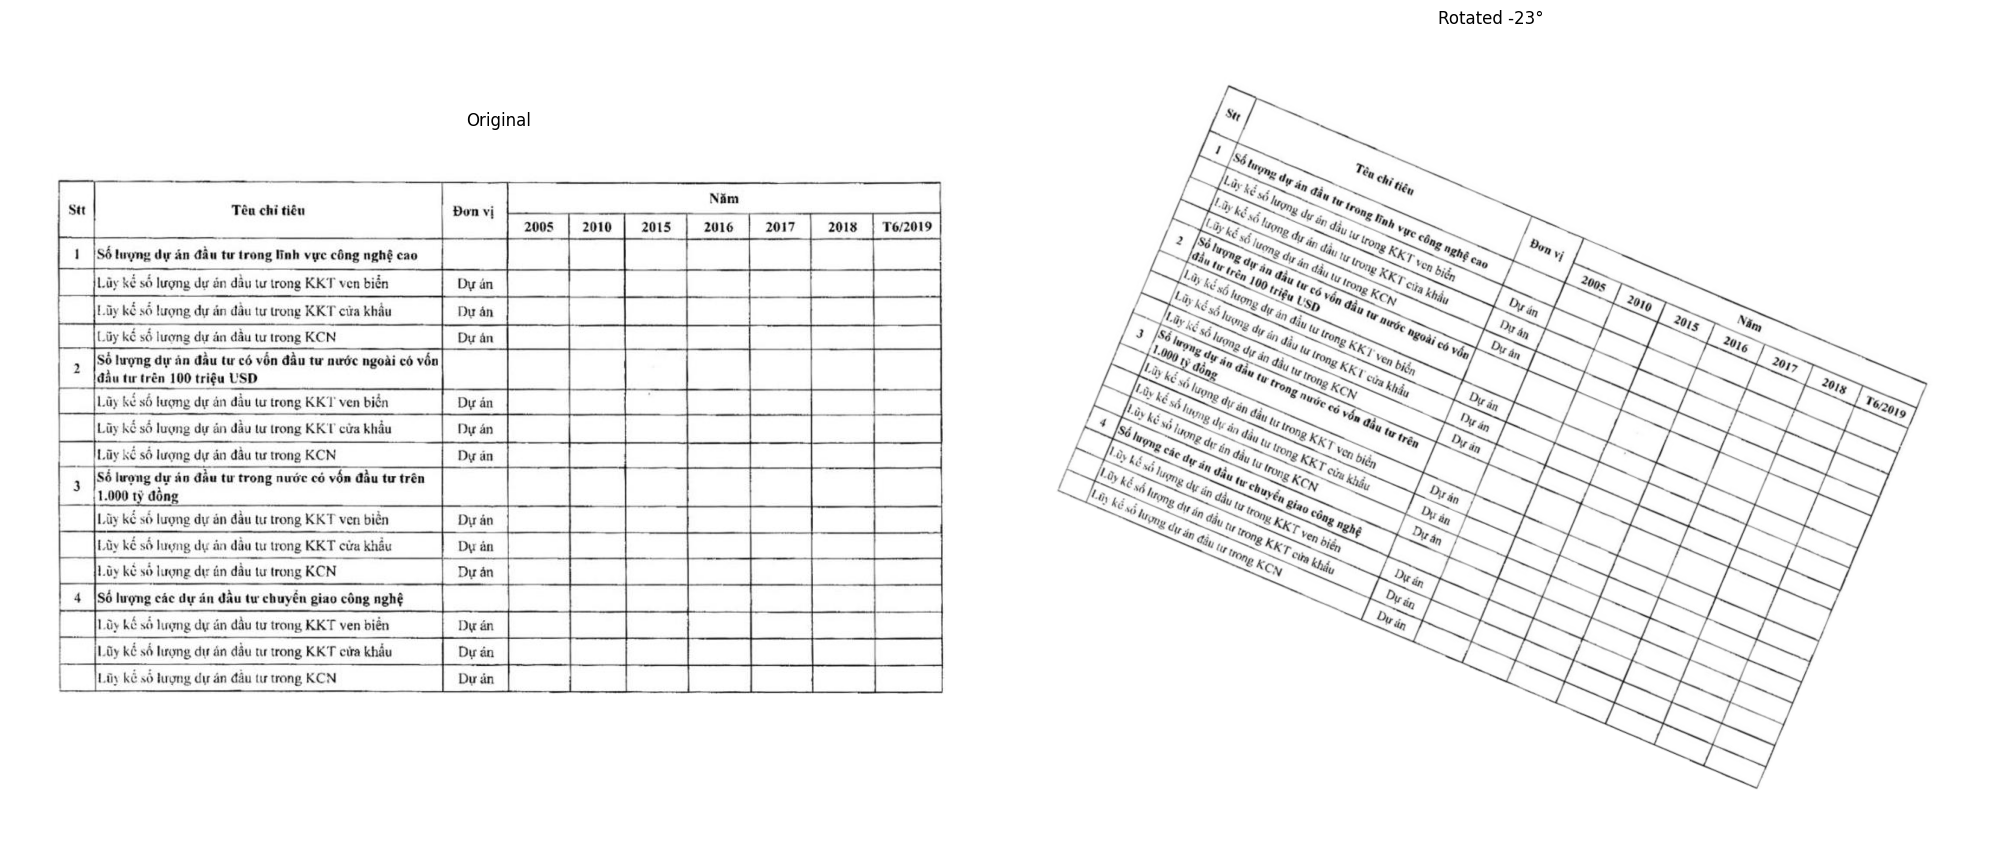

In [3]:
from utils.cv import *
from matplotlib import pyplot as plt
import cv2
import random

image_path = prePath + "sample/vn1.jpg"
image = cv2.imread(image_path)
angle = random.randint(-30, 30)
rotated_image = rotate_image(image, angle)
# thiết lập kích thước hiển thị ảnh
plt.figure(figsize=(10, 20))
# hiển thị ảnh gốc và ảnh đã xoay
display_images_with_labels([(image, "Original"), (rotated_image, f"Rotated {str(angle)}°")], (1, 2), show_axis=False)

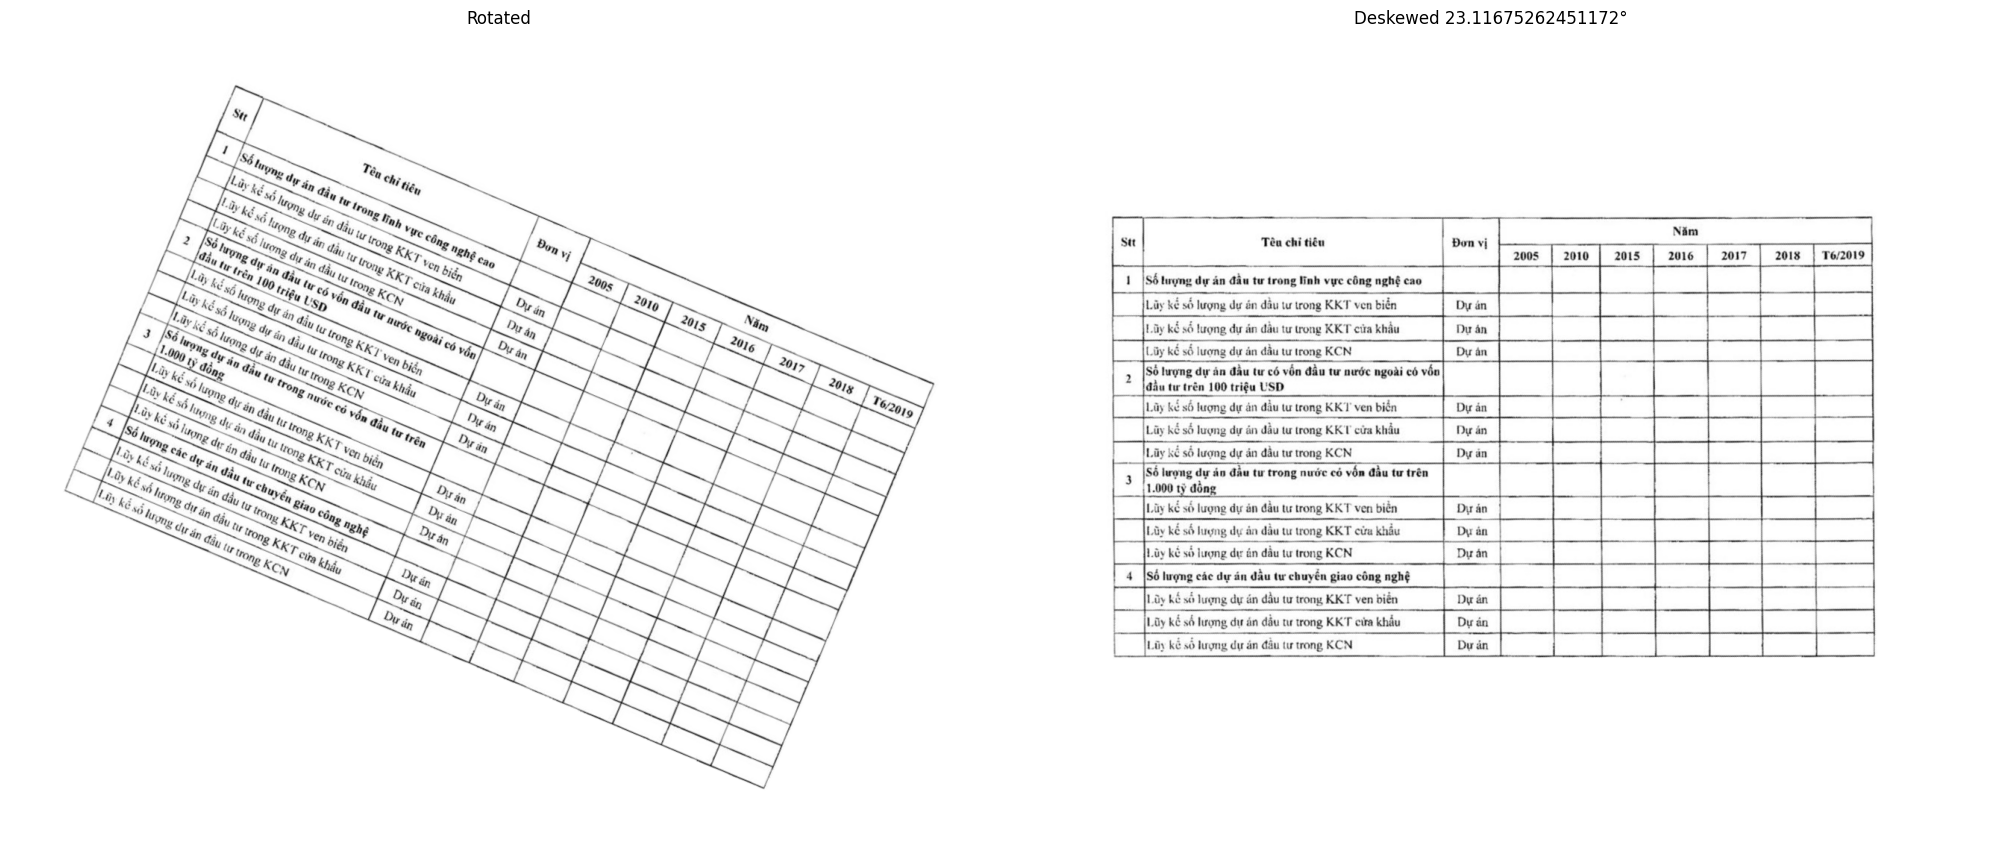

In [4]:
image_ok, calc_angle = deskew_image(rotated_image)
display_images_with_labels([(rotated_image, "Rotated"), (image_ok, f"Deskewed {str(calc_angle)}°")], (1, 2), show_axis=False)

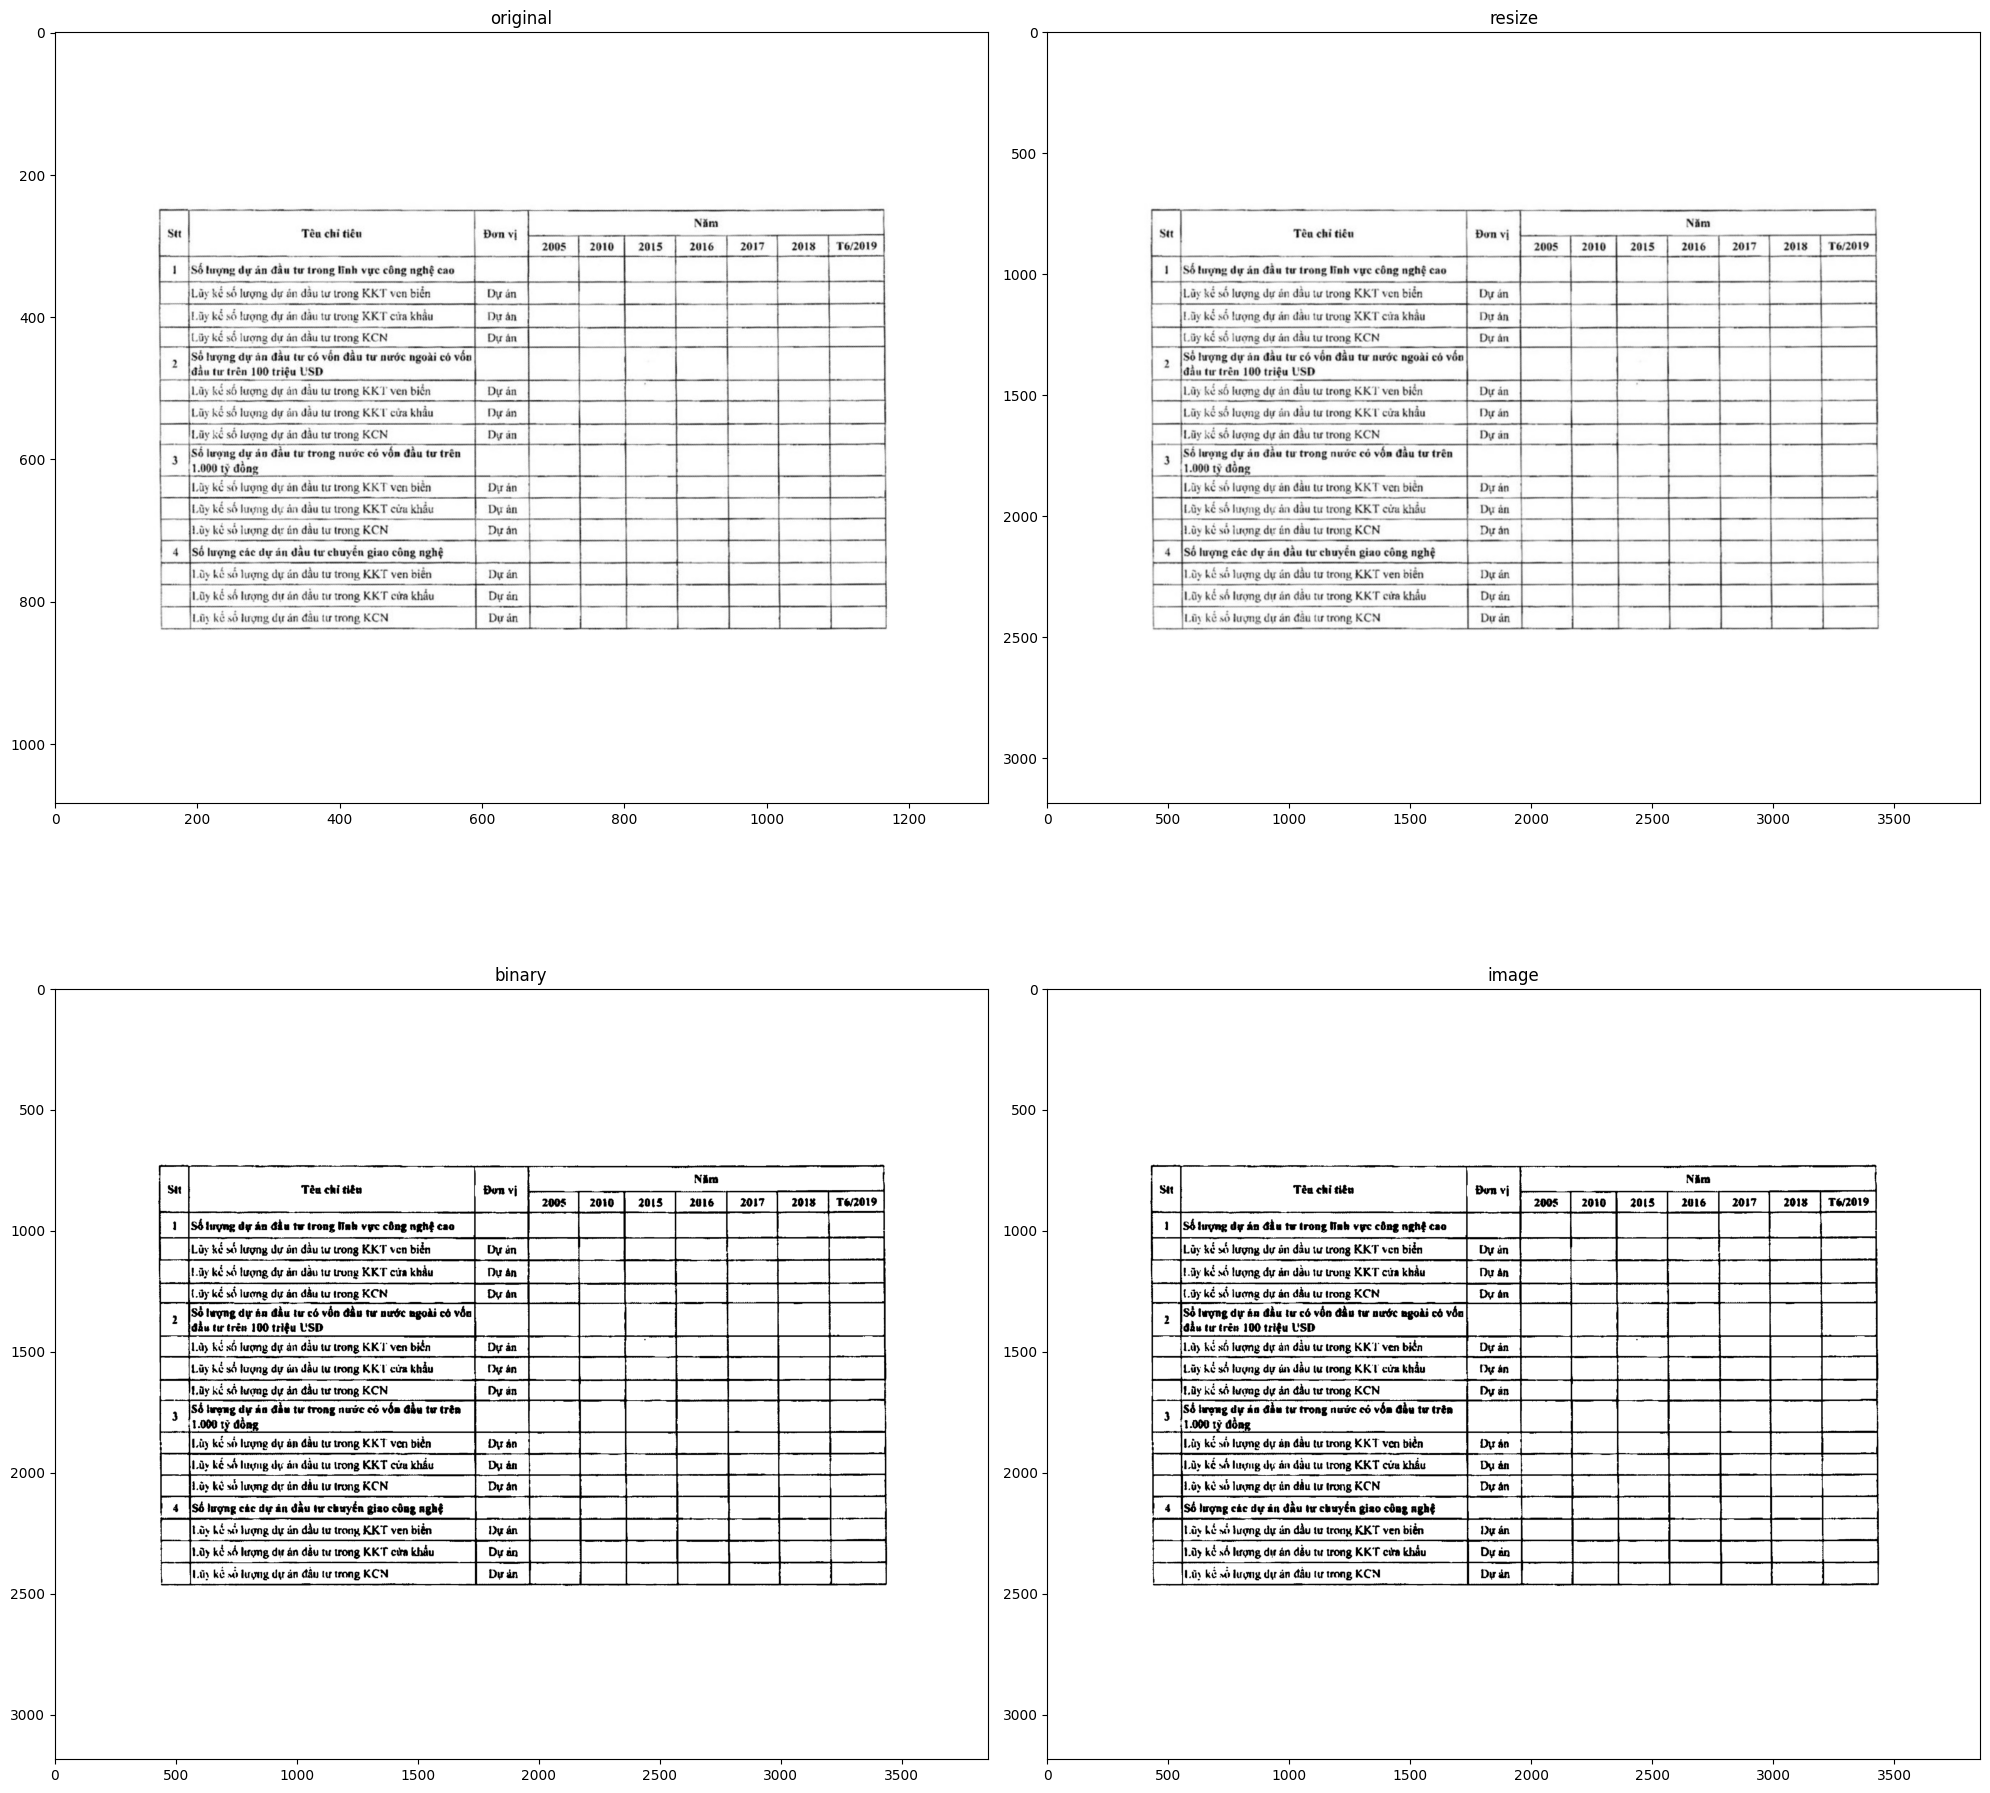

In [5]:
from detection.border_table_detection import *
outPre, image_pre, ratio = preProcessing(image_ok)
display_images_with_labels(outPre, (2, 2), show_axis=True)

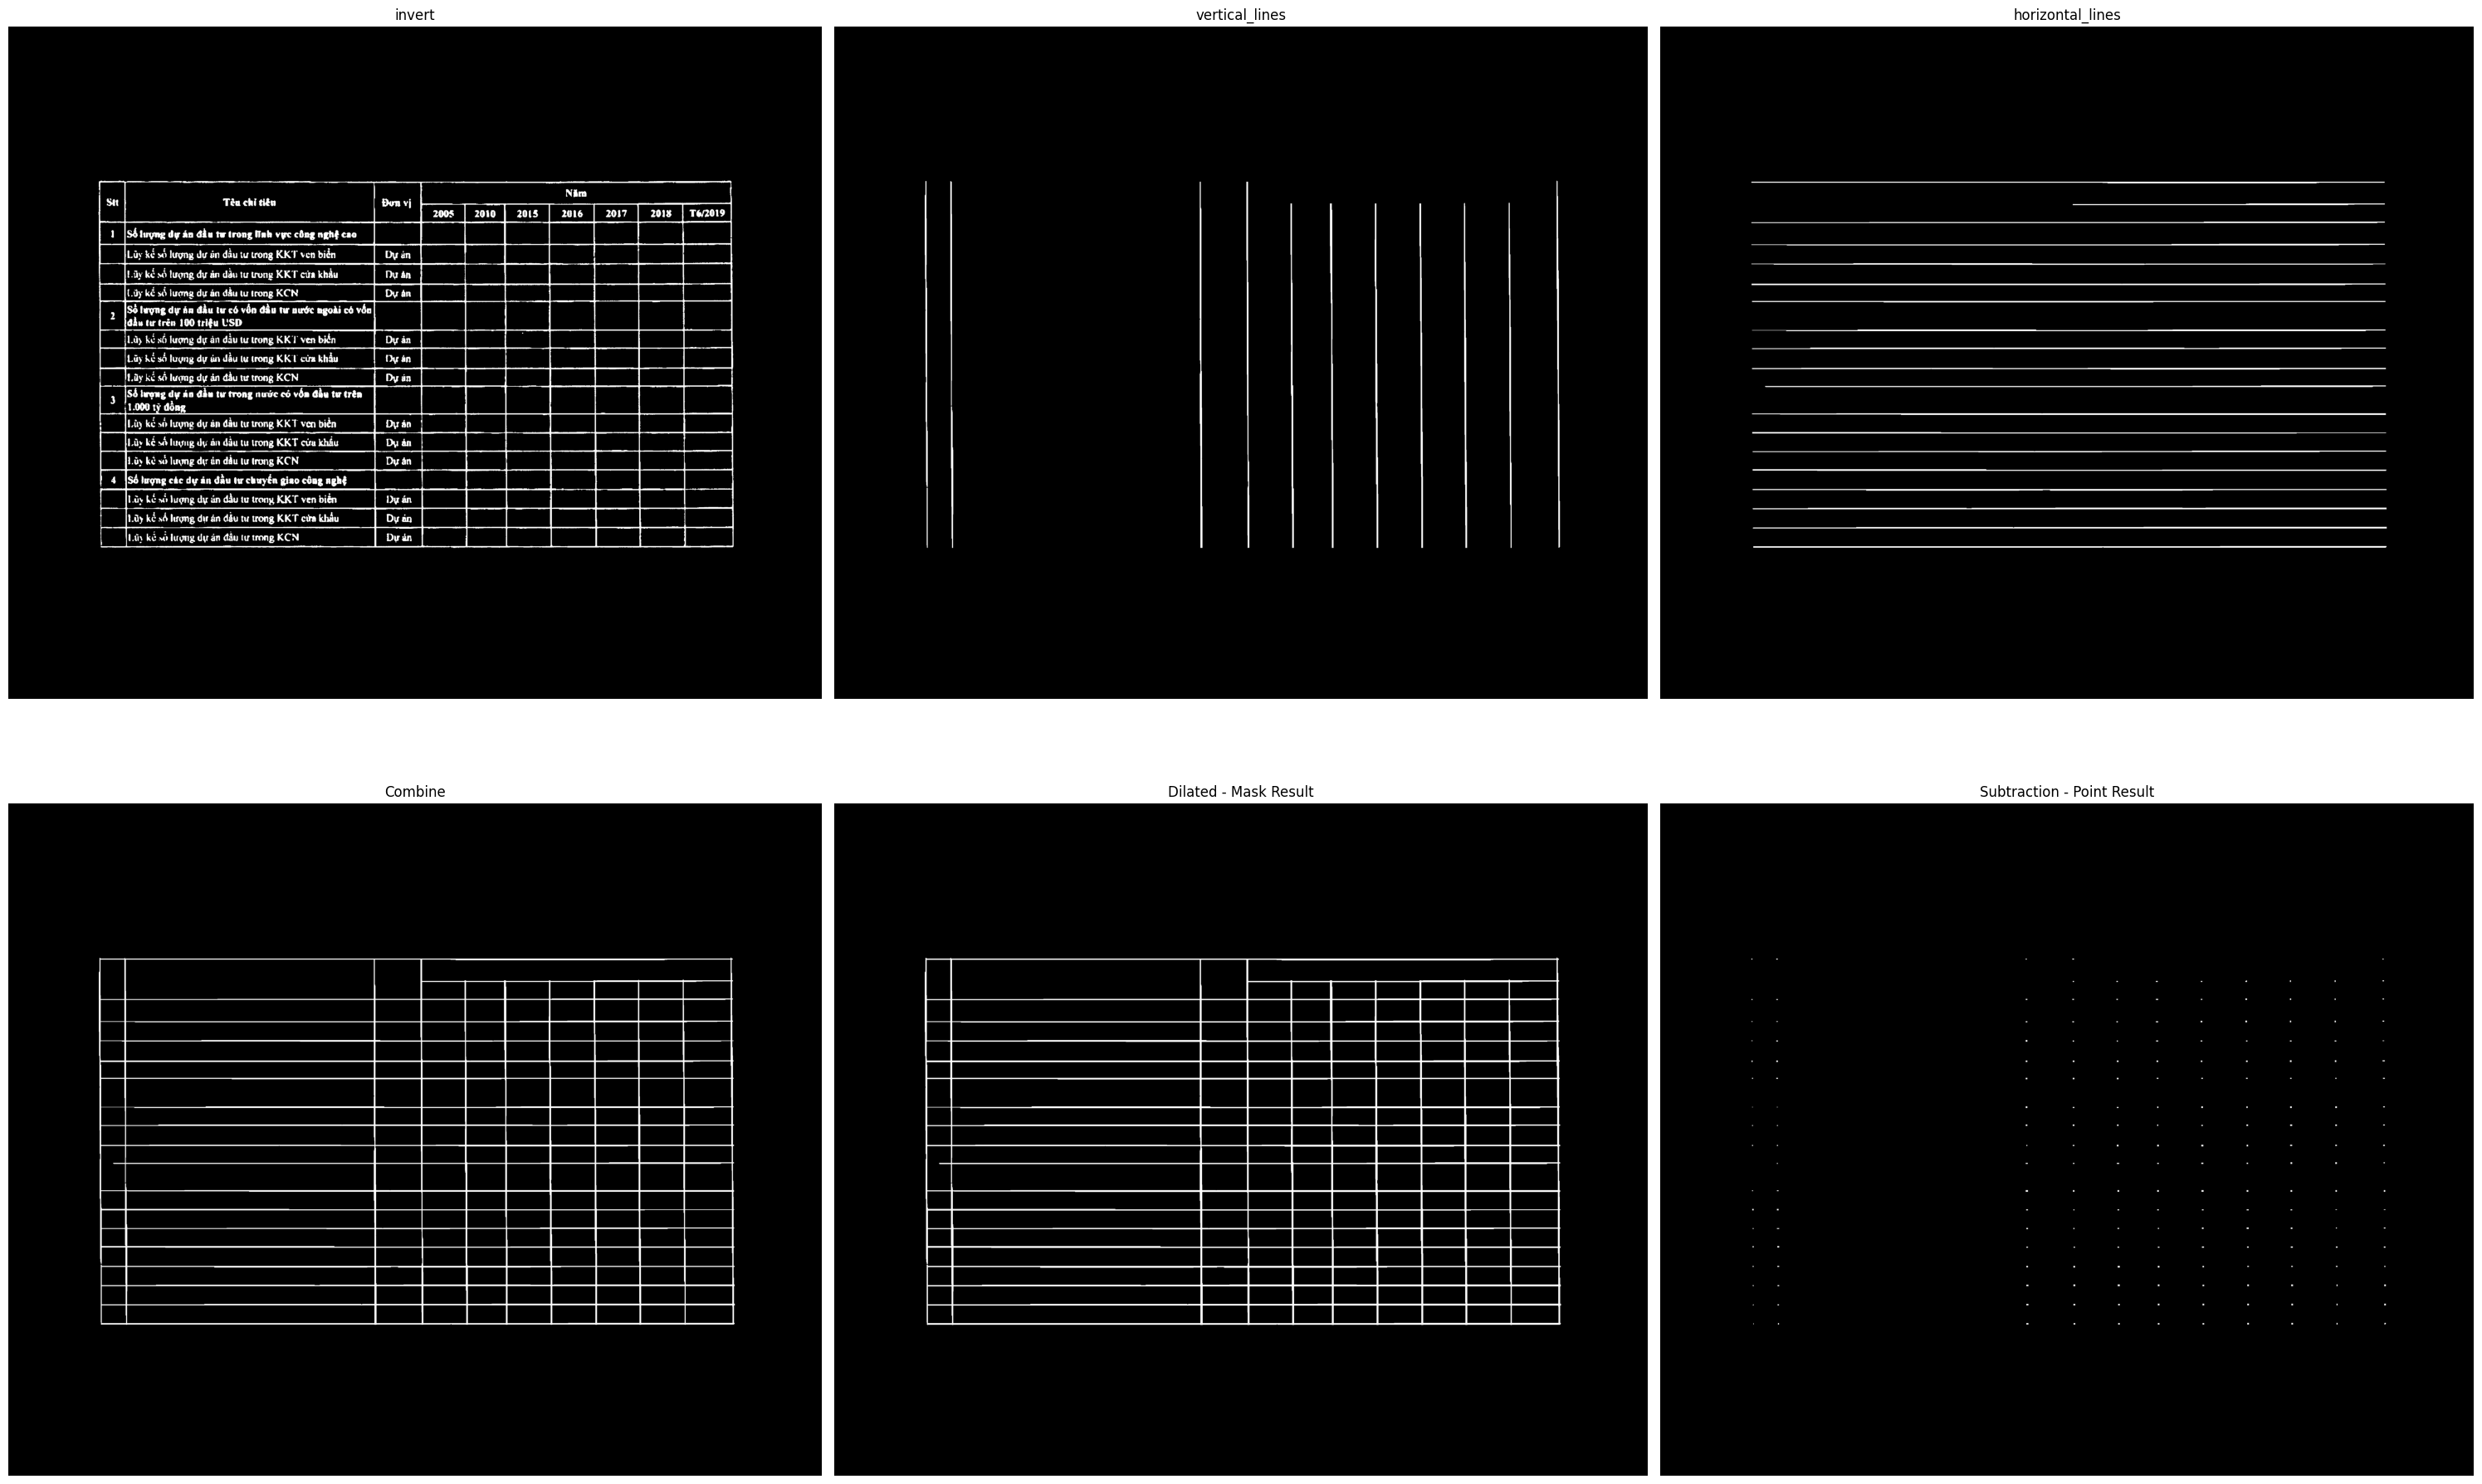

In [6]:
mask, dots, outImag = find_Lines(image_pre, 20, 50)
num_cols = 3
num_rows = len(outImag) // num_cols if len(outImag) % num_cols == 0 else len(outImag) // num_cols + 1
display_images_with_labels(outImag, (num_rows, num_cols), show_axis=False)

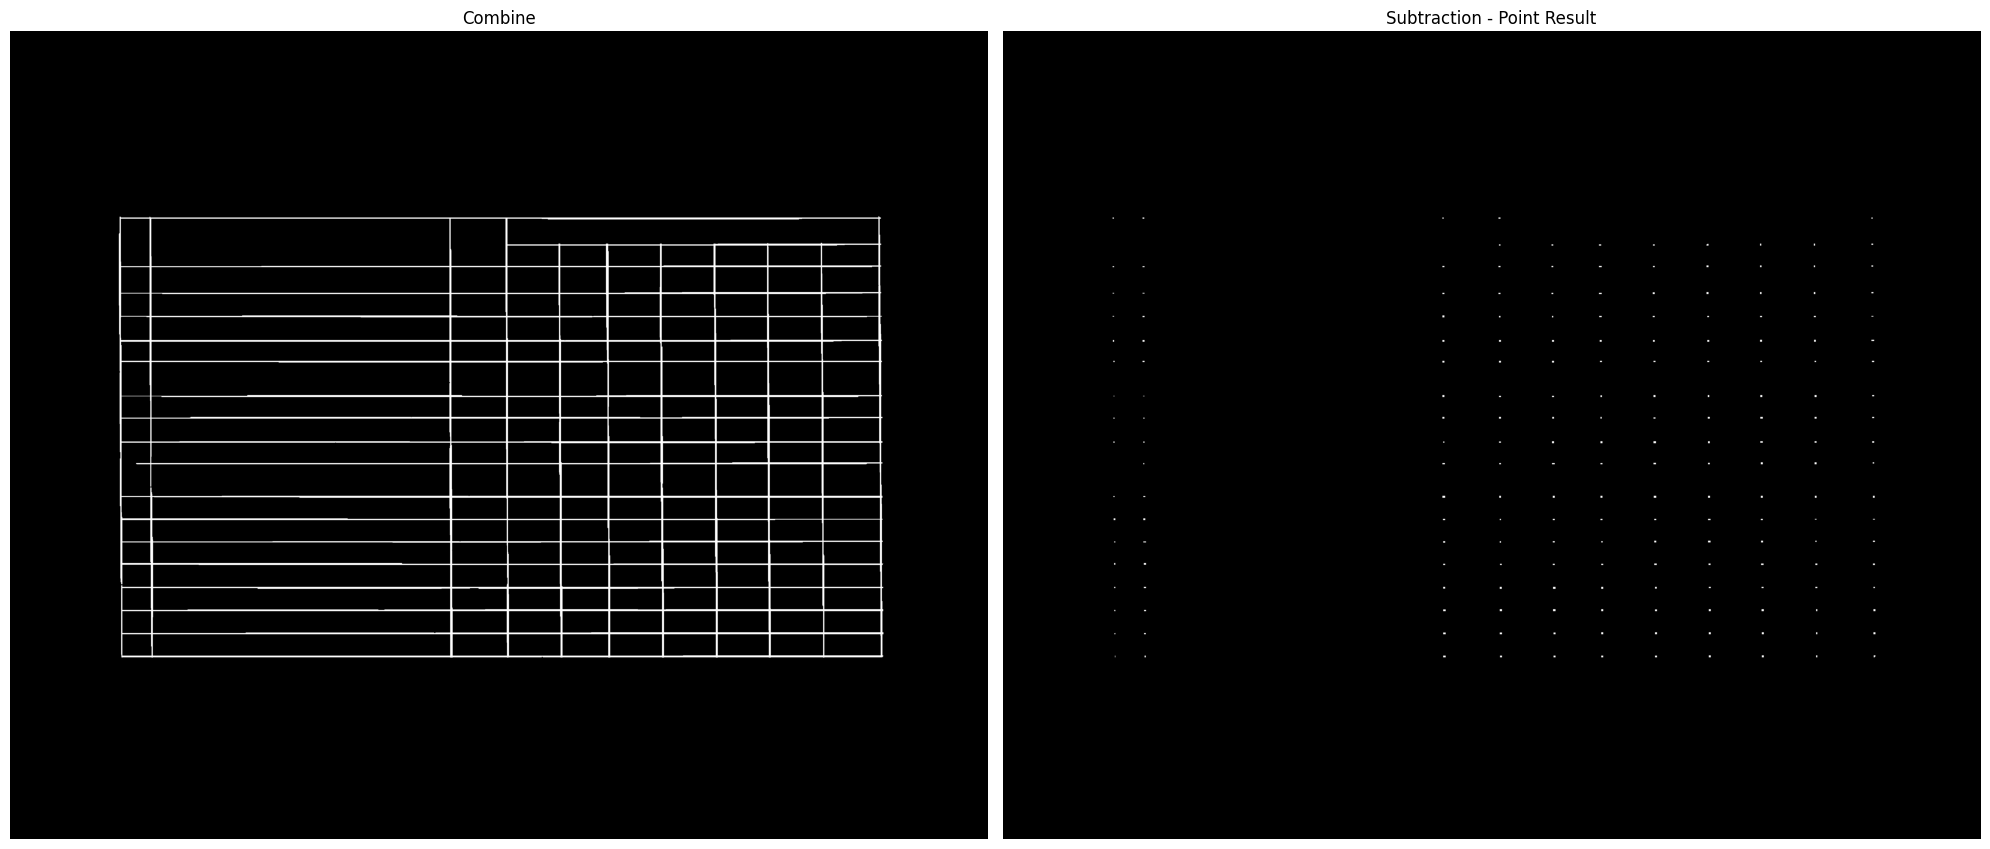

In [7]:
display_images_with_labels([outImag[-3], outImag[-1]], (1, 2), show_axis=False)

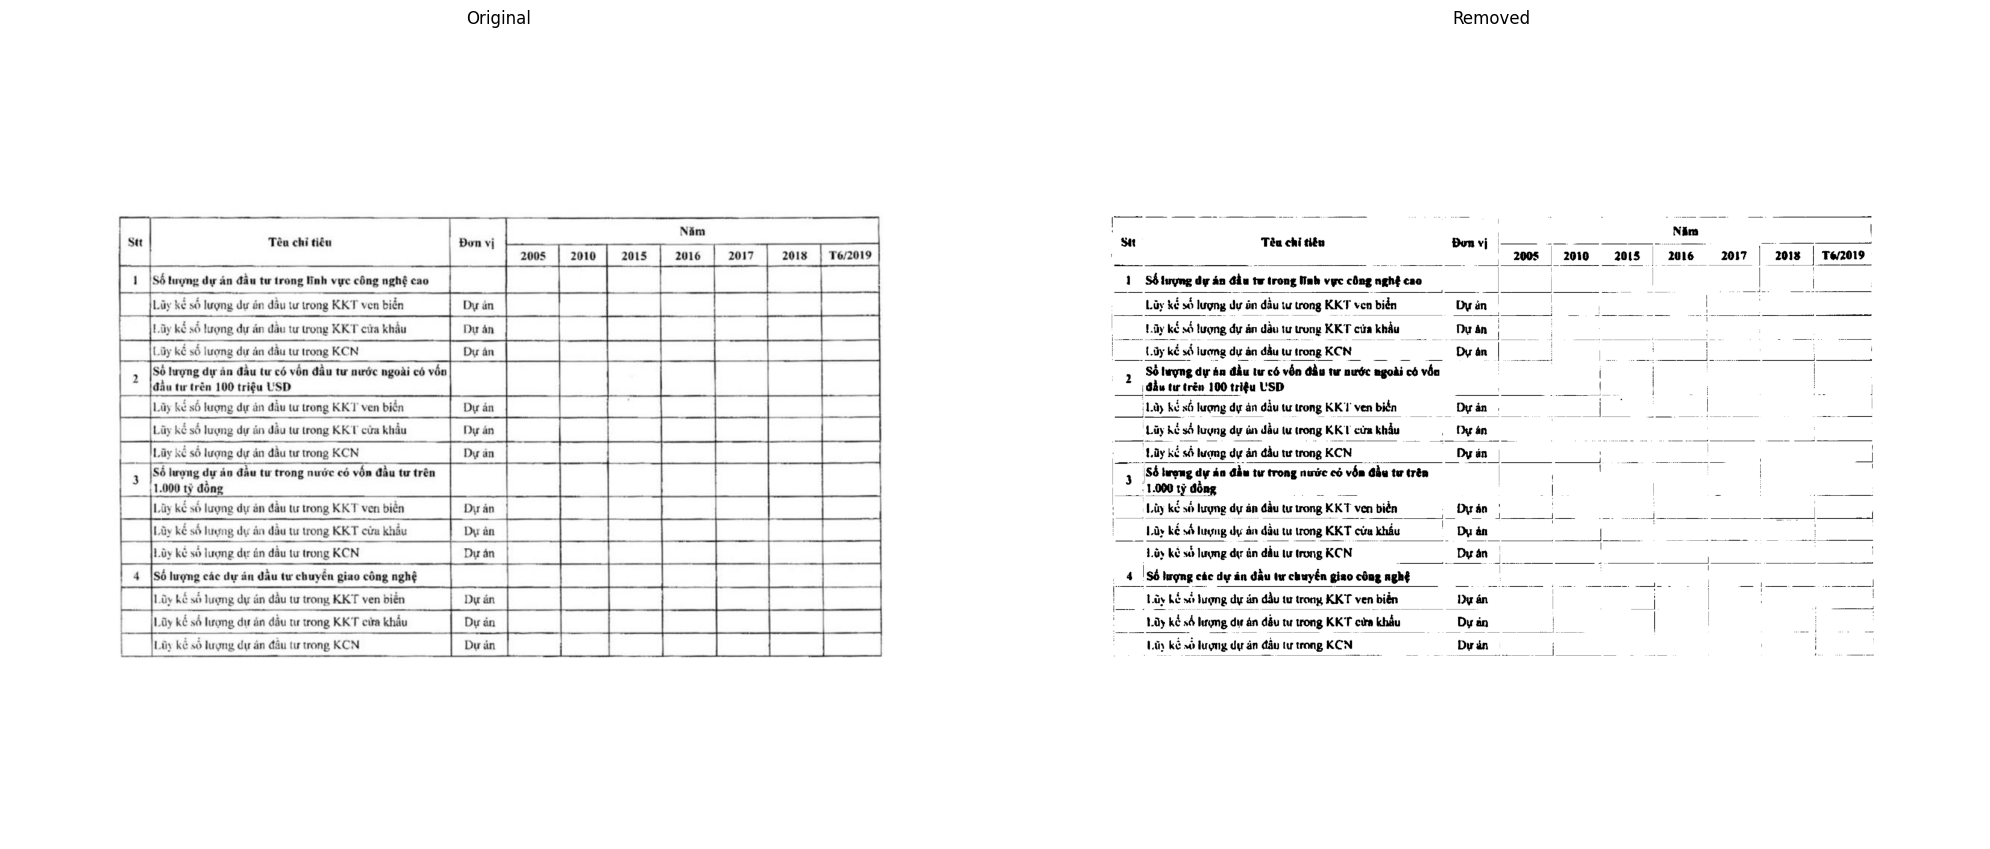

In [8]:
image_removed = remove_regions(image_pre, mask)
display_images_with_labels([(image_ok, "Original"), (image_removed, "Removed")], (1, 2), show_axis=False)

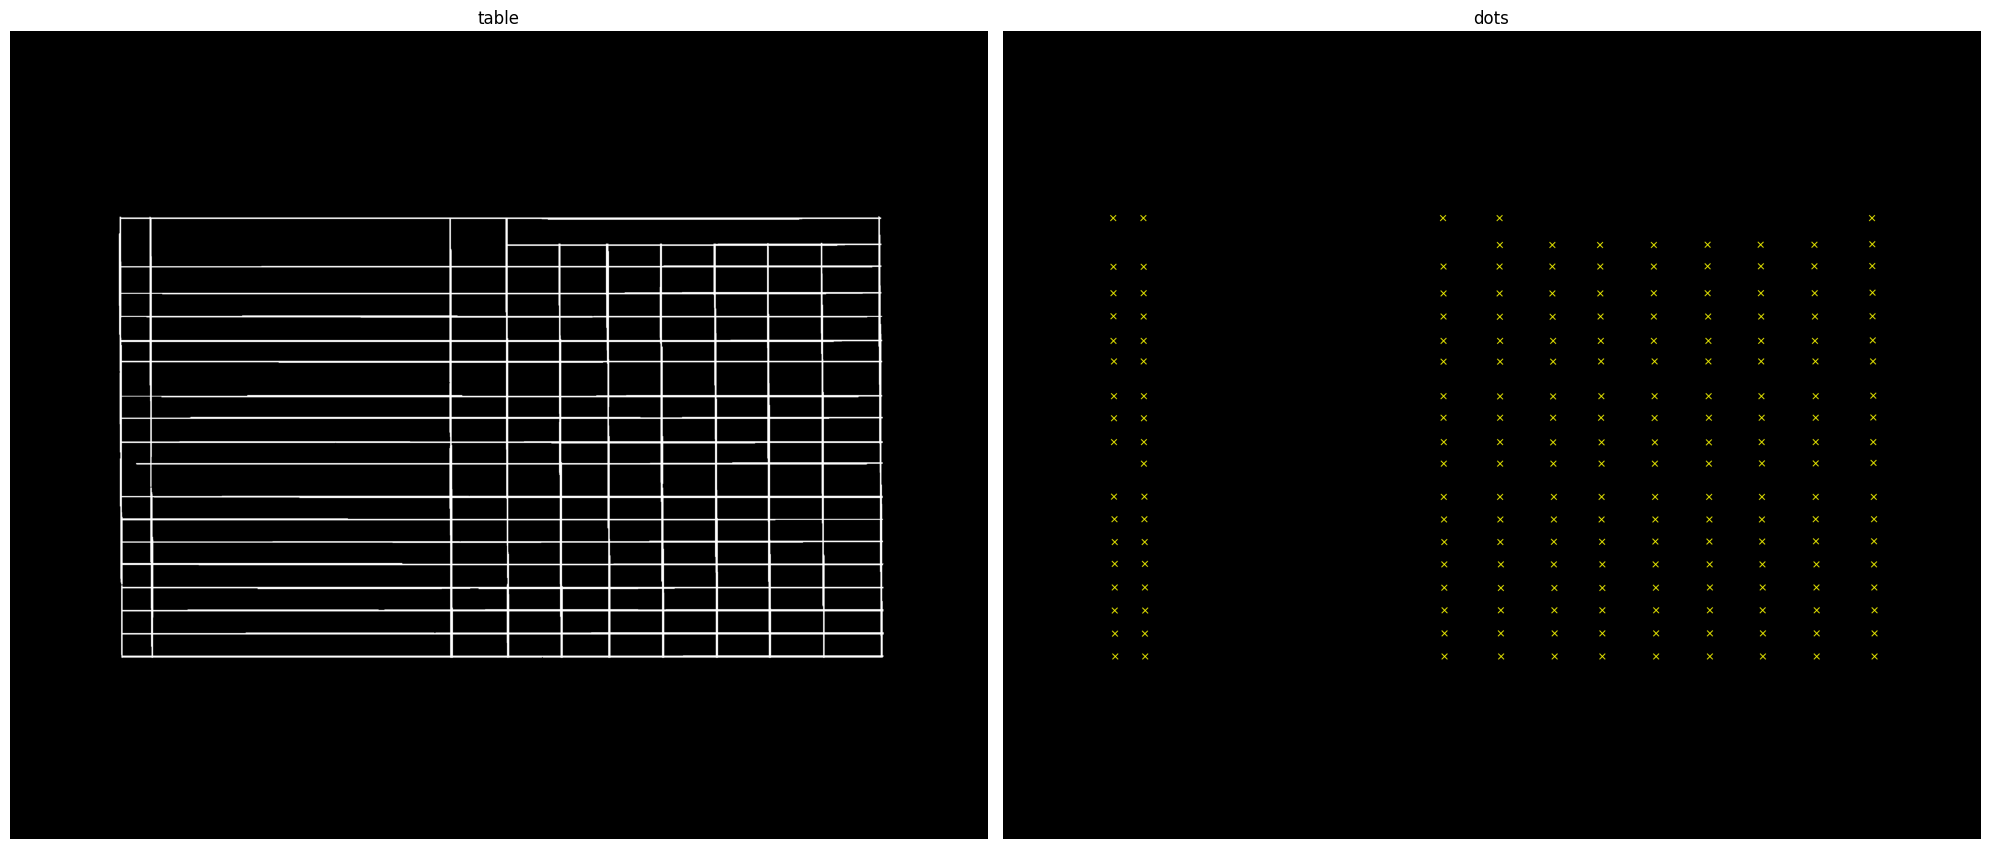

In [9]:
centers = findCenters(dots)
dots_img = drawCenters(image_pre, centers, size = 20, color=(0, 255, 255))
display_images_with_labels([(mask, "table"), (dots_img, "dots")], (1, 2), show_axis=False)

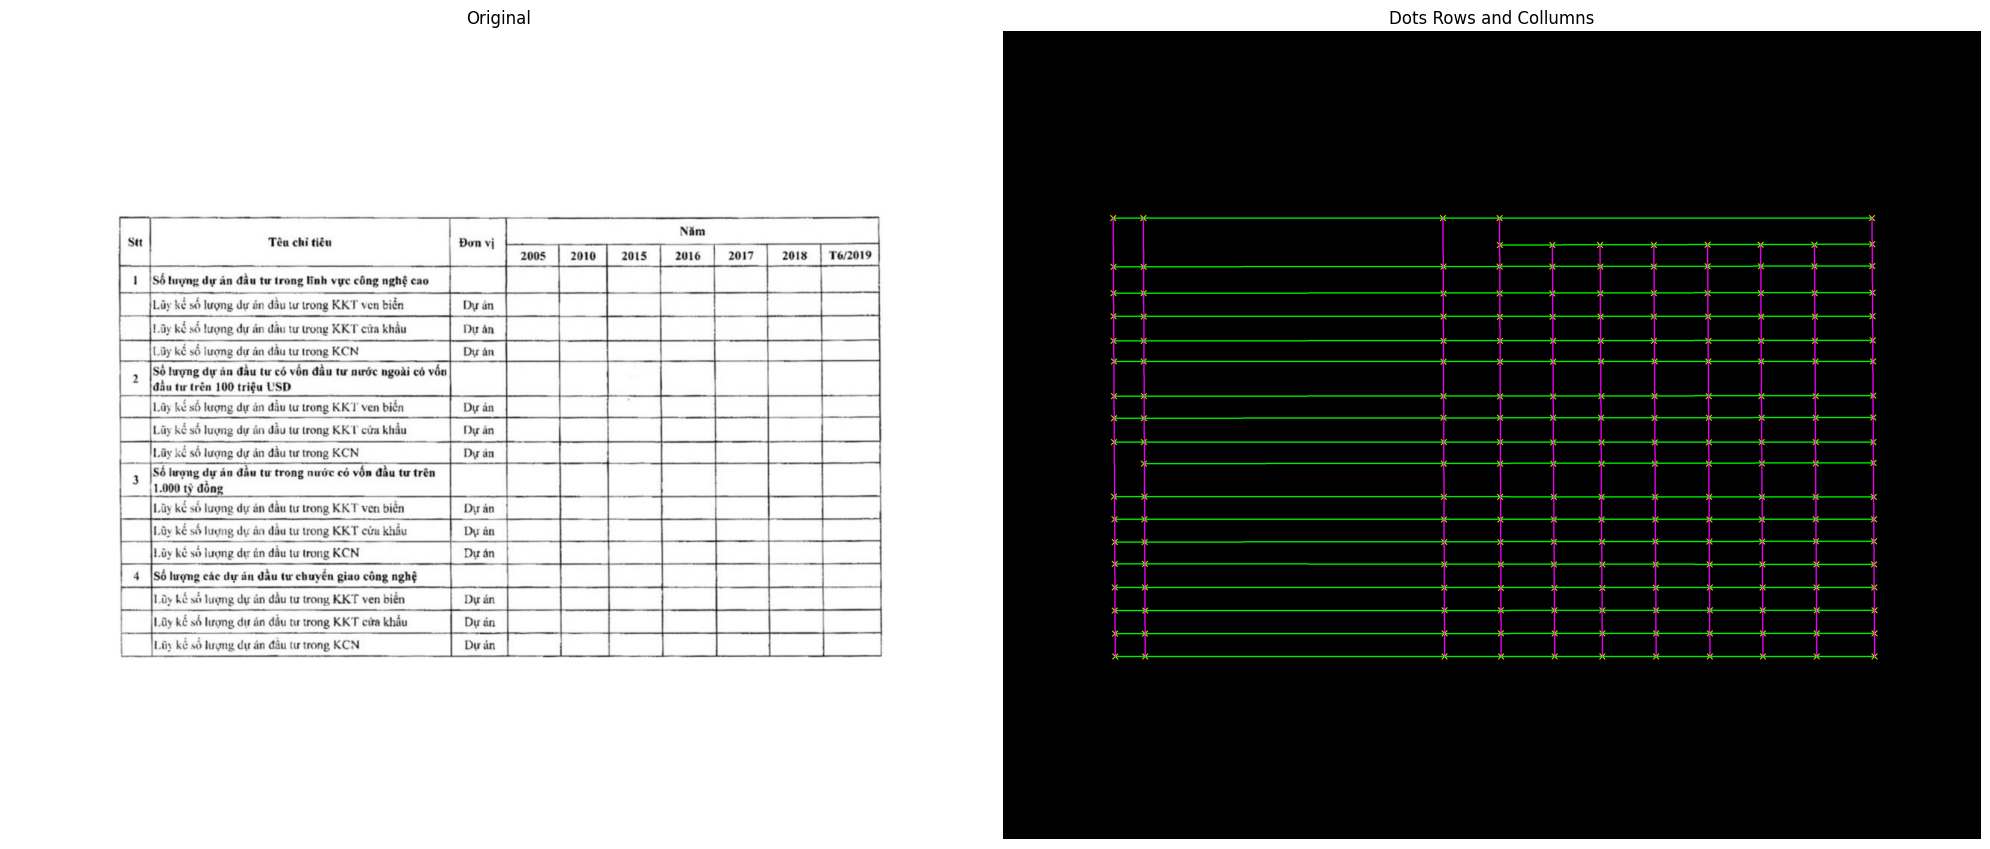

In [10]:
from utils.point import *
rows = split_rows_columns(centers, modeName='row')
columns = split_rows_columns(centers, modeName='column')
rows_collums_img = draw_rows_columns(dots_img, rows, columns)
display_images_with_labels([(image_ok, "Original"), (rows_collums_img, "Dots Rows and Collumns")], (1, 2), show_axis=False)

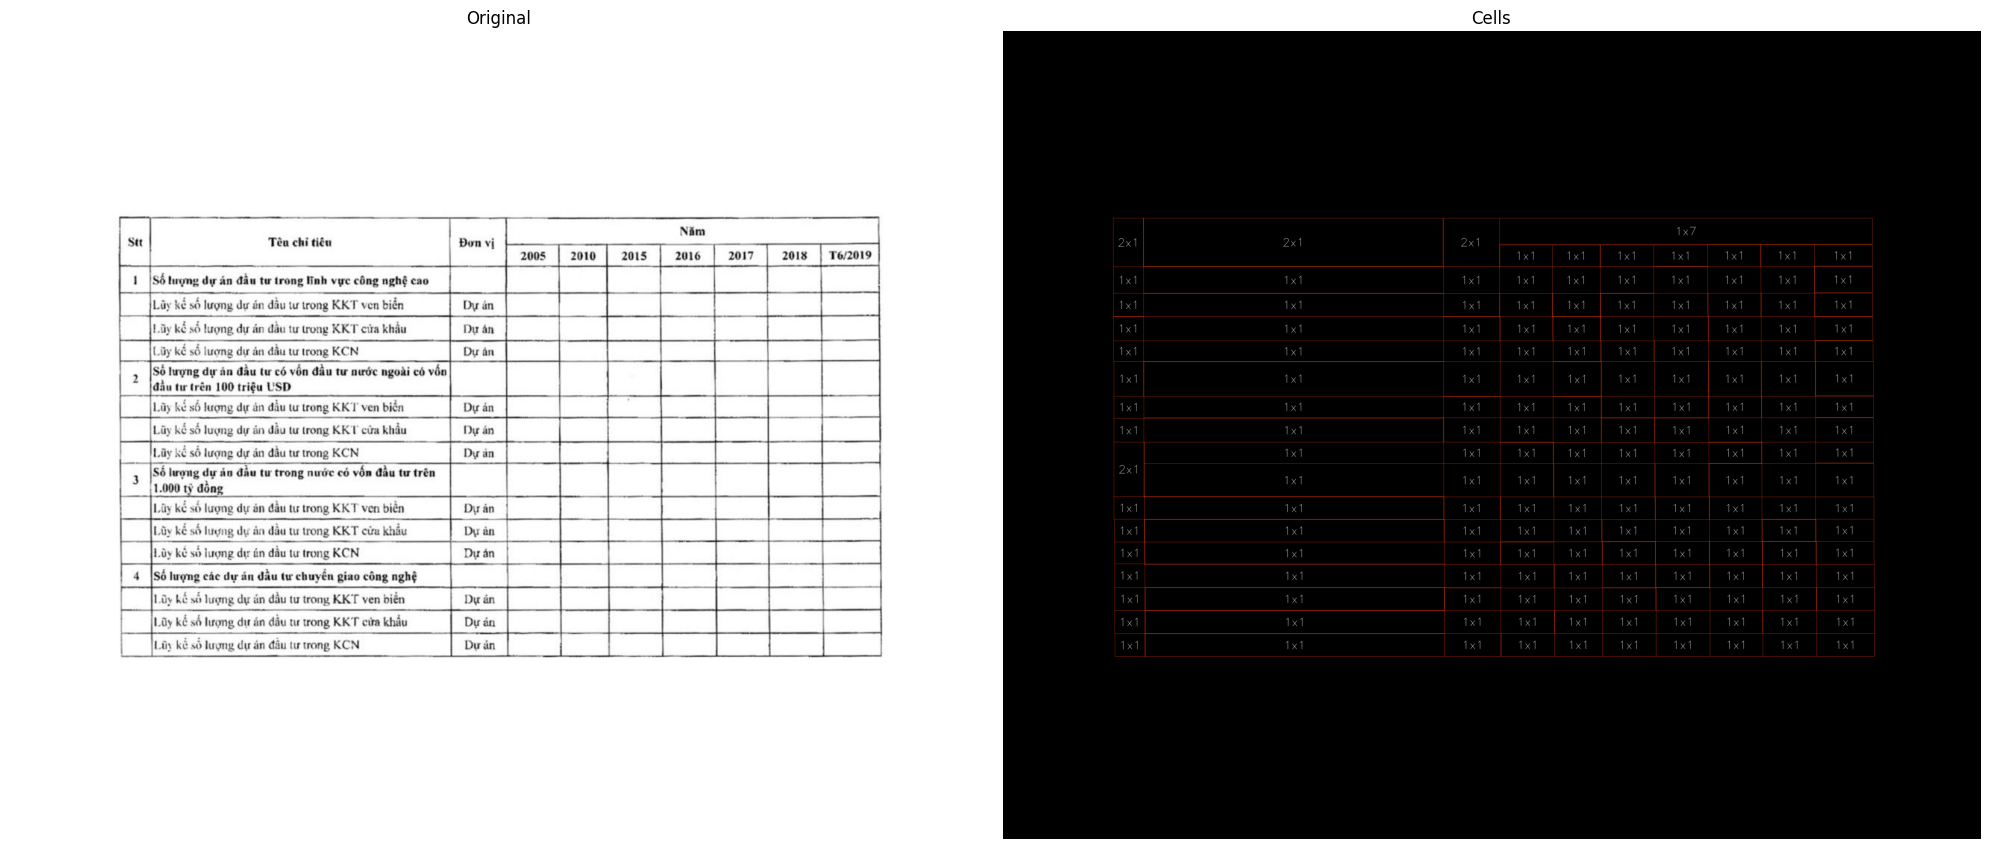

In [11]:
cells = create_cells(rows, columns, mask)
cells_img = draw_cells(rows_collums_img, cells, size=1.5, color=(255,255,255))
display_images_with_labels([(image_ok, "Original"), (cells_img, "Cells")], (1, 2), show_axis=False)

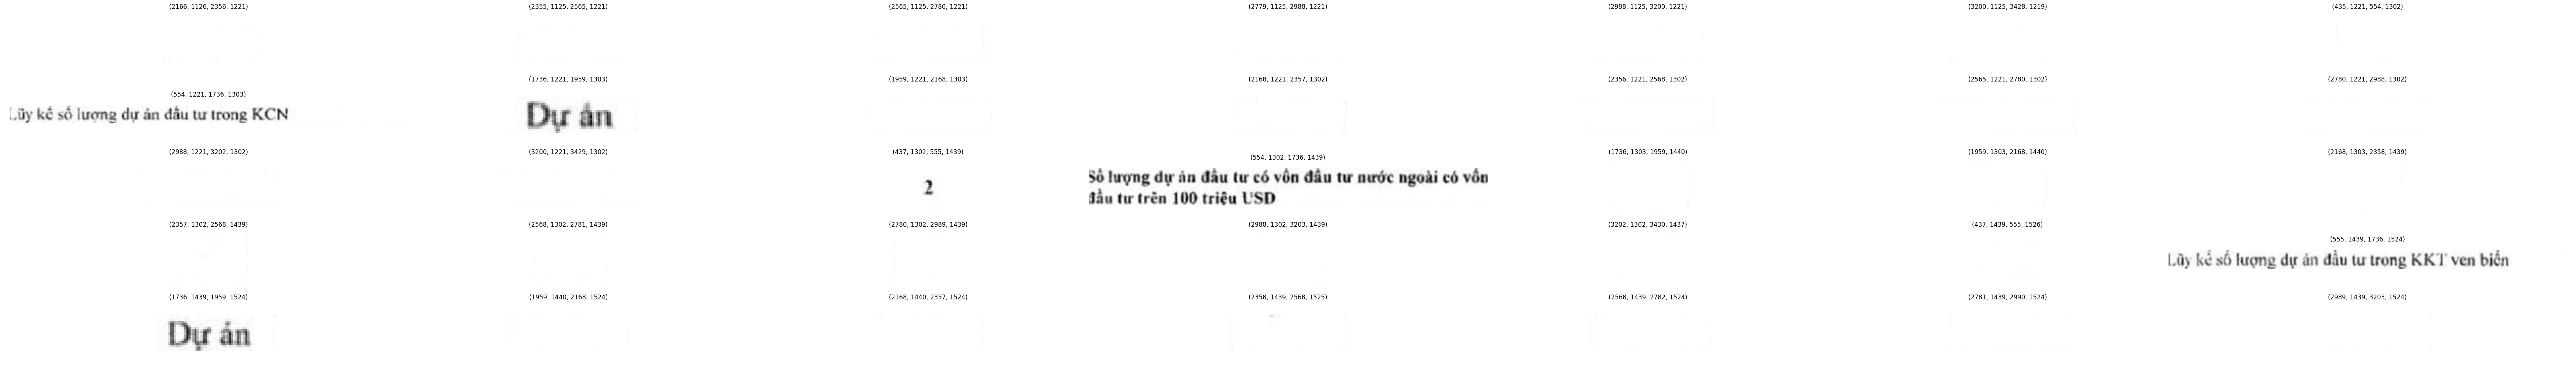

In [27]:
from utils.bbox import get_scale_bbox
cells_imgs = []
for cell in cells:
    x1,y1,x2,y2 = get_scale_bbox(cell['bbox'], 1/ratio)
    cropped_image = image_ok[int(y1):int(y2), int(x1):int(x2)]
    # x1,y1,x2,y2 = cell['bbox']
    # cropped_image = image_pre[int(y1):int(y2), int(x1):int(x2)]
    img = cropped_image.copy() #trim_white(cropped_image)
    cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (255, 255, 255), 10)
    cells_imgs += [(img, cell['bbox'])]

display_images_with_labels(cells_imgs[35:70], layout = (5, 7), size = (10, 2), show_axis=False)

Số lượng dự ản đầu tư có vôn đầu tư nước ngoài có vốn
Bầu tư trên 100 triệu USD


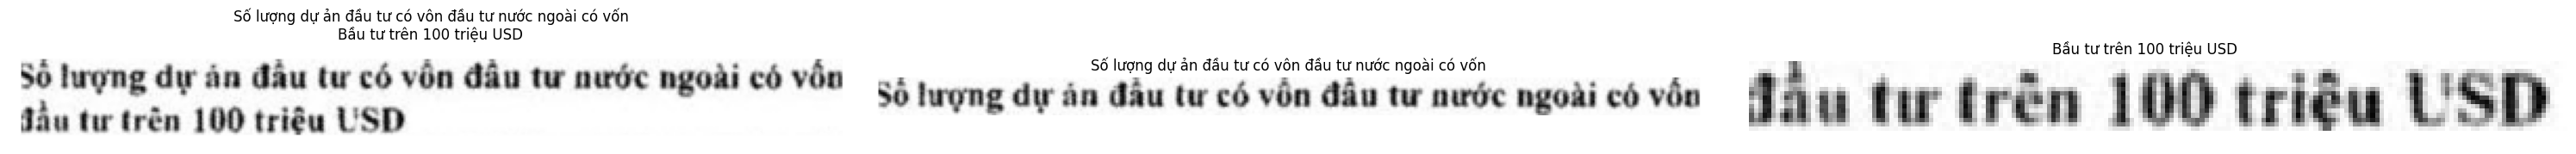

In [28]:
from utils.ocr import detectText
img = cells_imgs[52][0]
text, lines = detectText(img, detector)
print(text)
display_images_with_labels([(img, text)] + list(zip(lines, text.split('\n'))), (1, len(lines)+1), show_axis=False)

In [29]:
texts = []
for cell in cells_imgs:
  img, bbox = cell
  text, lines = detectText(img, detector)
  texts += [text]

print(texts, sep='\n')

['S1', 'Tên chi tiêu', 'Đơn vị', 'Năm', '2005', '2010', '2015', '2016', '2017', '2018', 'T6/2019', 'Bard', 'Số tượng dự án đầu tư trong lĩnh vực công nghệ cao', 'Substrate', 'Substrates', '', '', 'STATES', '', 'CONTERSION', '', 'Bard', 'Lũy kể số lượng dự án dầu tư trong KKT ven biển', 'Dự án', 'Substates', 'Substrated', '', 'Substates', '', '', '', 'Ins', 'Lũy kể số lượng dự ản đầu tư trong KKT cửa khẩu', 'Dư ản', 'Subsing', 'Substrated', 'STATES', 'STATES', '', 'CONTERSION', '', 'STATES', 'Lũy kế số lượng dự án đầu tư trong kcn', 'Dự án', 'Substrate', '', 'Substrates', '', '', '', '', '2', 'Số lượng dự ản đầu tư có vôn đầu tư nước ngoài có vốn\nBầu tư trên 100 triệu USD', 'STATES', 'Substrate', '', 'Substate', 'Bard', 'STATES\nSTRING', '', '', '', 'Lũy kế số lượng dự án đầu tư trong KKT ven biển tháng', 'Dự án', 'Substates', '', '', 'Substates', '', '', '', '', 'Lũy kế số lượng dự án đầu tư trong Khẩu', 'Dự án', '', '', '', 'Subsing', 'STATES', '', '', '3', 'Lũy kê số lượng dự ản đầu

In [30]:
from utils.table import *
cells_imgs = []
for i in range(len(cells)):
  cells[i]['cell text'] = texts[i]
html = cells_to_html(cells).replace('<thead>','<tr>').replace('</thead>','</tr>').replace('\n',"<br>")
html

'<table><tr><th rowspan="2">S1</th><th rowspan="2">Tên chi tiêu</th><th rowspan="2">Đơn vị</th><th colspan="7">Năm</th></tr><tr><td>2005</td><td>2010</td><td>2015</td><td>2016</td><td>2017</td><td>2018</td><td>T6/2019</td></tr><tr><td>Bard</td><td>Số tượng dự án đầu tư trong lĩnh vực công nghệ cao</td><td>Substrate</td><td>Substrates</td><td></td><td></td><td>STATES</td><td></td><td>CONTERSION</td><td></td></tr><tr><td>Bard</td><td>Lũy kể số lượng dự án dầu tư trong KKT ven biển</td><td>Dự án</td><td>Substates</td><td>Substrated</td><td></td><td>Substates</td><td></td><td></td><td></td></tr><tr><td>Ins</td><td>Lũy kể số lượng dự ản đầu tư trong KKT cửa khẩu</td><td>Dư ản</td><td>Subsing</td><td>Substrated</td><td>STATES</td><td>STATES</td><td></td><td>CONTERSION</td><td></td></tr><tr><td>STATES</td><td>Lũy kế số lượng dự án đầu tư trong kcn</td><td>Dự án</td><td>Substrate</td><td></td><td>Substrates</td><td></td><td></td><td></td><td></td></tr><tr><td>2</td><td>Số lượng dự ản đầu tư có

In [31]:
from IPython.display import display, HTML
new_html = createHTML(image_path, html, useBase64=IN_COLAB)
display(HTML(new_html))

In [18]:
from IPython.display import display, HTML
from detection.border_table_detection import recognize
display(HTML(recognize(prePath + "sample/vn1.jpg", detector, useBase64=IN_COLAB)))

In [19]:
display(HTML(recognize(prePath + "sample/L1.jpg", detector, useBase64=IN_COLAB)))

In [20]:
display(HTML(recognize(prePath + "sample/L2.jpg", detector, useBase64=IN_COLAB)))

In [21]:
display(HTML(recognize(prePath + "sample/L3.jpg", detector, useBase64=IN_COLAB)))

In [22]:
display(HTML(recognize(prePath + "sample/L5.jpg", detector, useBase64=IN_COLAB)))

In [23]:
display(HTML(recognize(prePath + "sample/L6.jpg", detector, useBase64=IN_COLAB)))